# 상장법인목록

KRX의 상장법인 목록: https://kind.krx.co.kr/corpgeneral/corpList.do?method=loadInitPage
 - xls로 다운로드

1. 해당 페이지 접근후 개발자 모드로 전환한다. Network 탭으로 이동한다.
2. Excel 다운로드 버튼 클릭 
    - `.xls` 파일이 html 파일이다.
3. Hedaers에서 Request Url 확인

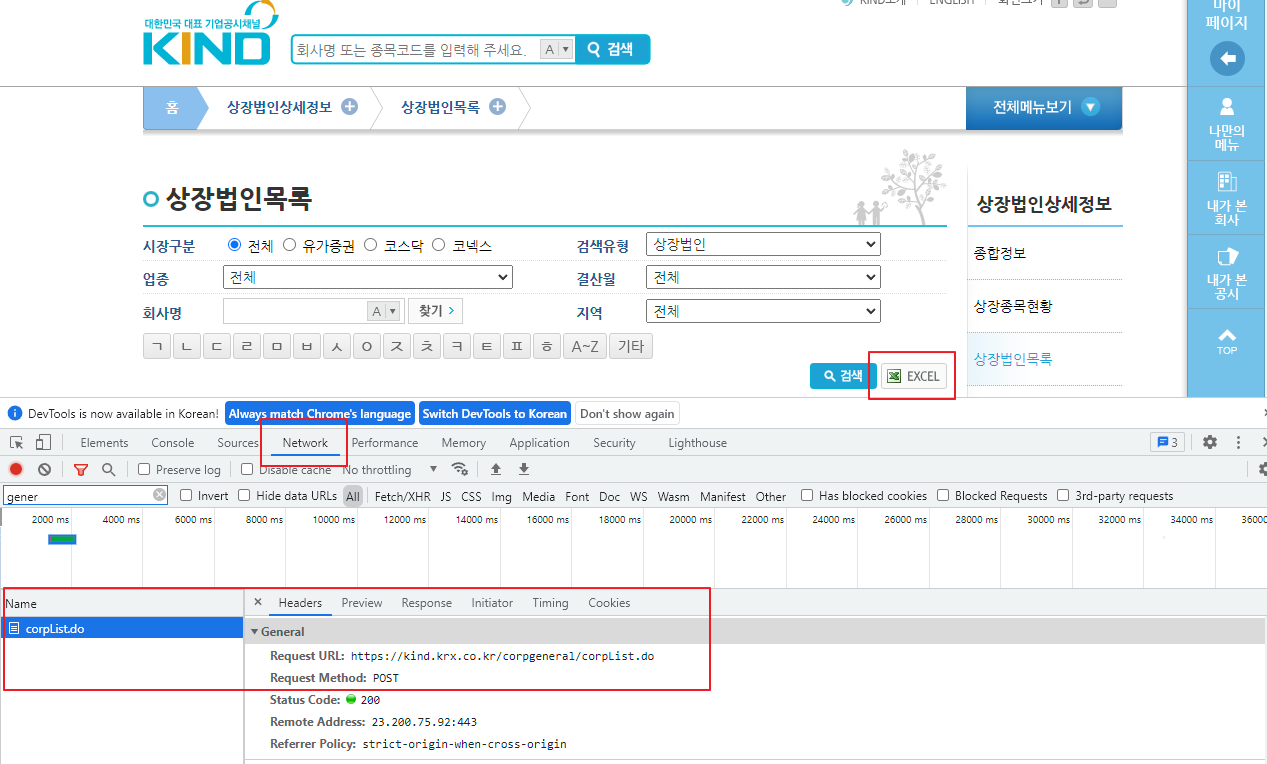

4. Headers 의 Form Data 확인

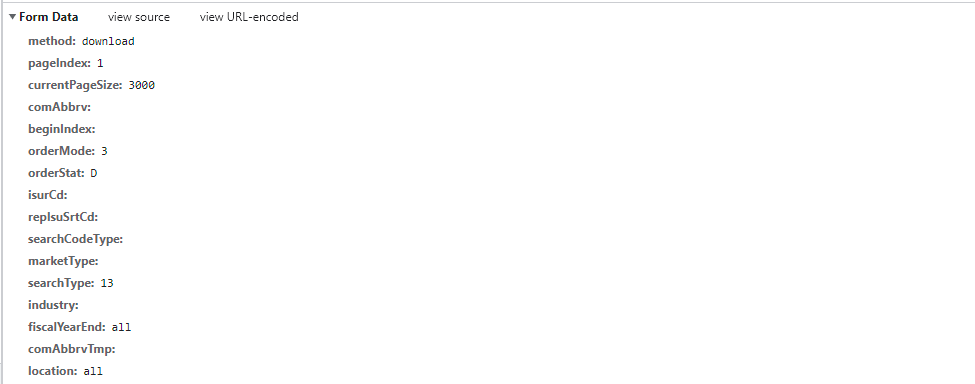

read_html 함수를 호출할 때 첫 번째 행을 헤더로 인식하도록 headers=0을 넣어줬고 종목코드를 숫자로 인식하지 않도록 converters 인자를 주었습니다.

이렇게 코스피, 코스닥, 코넥스 전체 또는 시장 별로 종목 목록을 받아올 수 있습니다.

In [14]:
import time
import pandas as pd
import requests
from io import BytesIO

_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.104 Safari/537.36"
gen_req_url = 'https://kind.krx.co.kr/corpgeneral/corpList.do?method=loadInitPage'
query_str_parms = {
    'authority': 'kind.krx.co.kr'
}
headers = {
    'Upgrade-Insecure-Requests': '1',
    'User-Agent': _agent #generate.cmd에서 찾아서 입력하세요
}
r = requests.get(gen_req_url, query_str_parms, headers=headers)
form_data = {
    'method' : 'download',
    'pageIndex': 1,
    'currentPageSize': 3000,
    'orderMode': 3,
    'orderStat': 'D',
    'searchType': 13,
    'industry': '', 
    'fiscalYearEnd': 'all',
    'comAbbrvTmp' :'', 
    'location': 'all'
}


gen_req_url = 'https://kind.krx.co.kr/corpgeneral/corpList.do'
r = requests.post(gen_req_url, form_data, headers=headers)
df = pd.read_html(r.content, header=0, converters={'종목코드': lambda x: str(x)})[0]
df

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,씨유테크,376290,전자부품 제조업,"휴대폰, 전장 등 실장부품",2021-10-08,12월,백영현,http://www.cutech.co.kr,경기도
1,아스플로,159010,일반 목적용 기계 제조업,"강관, 피팅, 밸브류 등",2021-10-07,12월,강두홍,http://www.asflow.com,경기도
2,원준,382840,특수 목적용 기계 제조업,2차전지용 열처리 장비,2021-10-07,12월,이성제,http://www.onejoon.co.kr/,경기도
3,하나금융19호스팩,388220,금융 지원 서비스업,기업인수목적,2021-10-07,12월,홍지헌,NaN,서울특별시
4,엔에이치스팩20호,391060,금융 지원 서비스업,기업 인수합병,2021-10-05,12월,곽대환,NaN,서울특별시
...,...,...,...,...,...,...,...,...,...
2458,CJ대한통운,000120,도로 화물 운송업,"Contract Logistics, 포워딩, 항만하역, 해운, 택배국제특송, SCM...",1956-07-02,12월,강신호,http://www.cjlogistics.com,서울특별시
2459,메리츠화재,000060,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시
2460,경방,000050,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시
2461,유수홀딩스,000700,회사 본부 및 경영 컨설팅 서비스업,지주사업,1956-03-03,12월,송영규,http://www.eusu-holdings.com,서울특별시


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463 entries, 0 to 2462
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   회사명     2463 non-null   object
 1   종목코드    2463 non-null   object
 2   업종      2463 non-null   object
 3   주요제품    2444 non-null   object
 4   상장일     2463 non-null   object
 5   결산월     2463 non-null   object
 6   대표자명    2463 non-null   object
 7   홈페이지    2314 non-null   object
 8   지역      2463 non-null   object
dtypes: object(9)
memory usage: 173.3+ KB


In [8]:
import pandas as pd
import requests

def listed_corporations(market=None):
    market_type = {
       'kospi' : 'stockMkt', 
       'kosdaq': 'kosdaqMkt',
       'konex': 'konexMkt'
    }

    _agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.104 Safari/537.36"
    gen_req_url = 'https://kind.krx.co.kr/corpgeneral/corpList.do?method=loadInitPage'
    query_str_parms = {
        'authority': 'kind.krx.co.kr',
        'method' :  'searchCorpList' if market != None else 'download',
        'marketType': market_type[market] if market != None else ''
    }
    #print(query_str_parms)
    headers = {
        'Upgrade-Insecure-Requests': '1',
        'User-Agent': _agent #generate.cmd에서 찾아서 입력하세요
    }

    r = requests.get(gen_req_url, query_str_parms, headers=headers)
    
    # Download POST
    form_data = {
        'method' : 'download' if market == None else 'searchCorpList',
        'pageIndex': 1,
        'currentPageSize': 5000,
        'orderMode': 3,
        'orderStat': 'D',
        'searchType': 13,
        'industry': '', 
        'fiscalYearEnd': 'all',
        'comAbbrvTmp' :'', 
        'location': 'all'
    }
    #print(form_data)

    gen_req_url = 'https://kind.krx.co.kr/corpgeneral/corpList.do'
    r = requests.post(gen_req_url, form_data, headers=headers)
    df = pd.read_html(r.content, header=0)[0] #, converters={'종목코드': lambda x: str(x)})[0]
    df['종목코드'] = df['종목코드'].map('{:06d}'.format)
    return df

In [9]:
# All 상장법인목록
df = listed_corporations()
df

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,씨유테크,376290,전자부품 제조업,"휴대폰, 전장 등 실장부품",2021-10-08,12월,백영현,http://www.cutech.co.kr,경기도
1,아스플로,159010,일반 목적용 기계 제조업,"강관, 피팅, 밸브류 등",2021-10-07,12월,강두홍,http://www.asflow.com,경기도
2,원준,382840,특수 목적용 기계 제조업,2차전지용 열처리 장비,2021-10-07,12월,이성제,http://www.onejoon.co.kr/,경기도
3,하나금융19호스팩,388220,금융 지원 서비스업,기업인수목적,2021-10-07,12월,홍지헌,NaN,서울특별시
4,엔에이치스팩20호,391060,금융 지원 서비스업,기업 인수합병,2021-10-05,12월,곽대환,NaN,서울특별시
...,...,...,...,...,...,...,...,...,...
2458,CJ대한통운,000120,도로 화물 운송업,"Contract Logistics, 포워딩, 항만하역, 해운, 택배국제특송, SCM...",1956-07-02,12월,강신호,http://www.cjlogistics.com,서울특별시
2459,메리츠화재,000060,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시
2460,경방,000050,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시
2461,유수홀딩스,000700,회사 본부 및 경영 컨설팅 서비스업,지주사업,1956-03-03,12월,송영규,http://www.eusu-holdings.com,서울특별시


In [33]:
# 시장 --  안된다...
df = listed_corporations('konex')
df

{'authority': 'kind.krx.co.kr', 'method': 'searchCorpList', 'marketType': 'konexMkt'}
{'method': 'searchCorpList', 'pageIndex': 1, 'currentPageSize': 5000, 'orderMode': 3, 'orderStat': 'D', 'searchType': 13, 'industry': '', 'fiscalYearEnd': 'all', 'comAbbrvTmp': '', 'location': 'all'}


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,ì¨ì í í¬,ì ìë¶í ì ì¡°ì,"í´ëí°, ì ì¥ ë± ì¤ì¥ë¶í",2021-10-08,12ì,ë°±ìí,ííì´ì§ ë³´ê¸°,ê²½ê¸°ë
1,ìì¤íë¡,ì¼ë° ëª©ì ì© ê¸°ê³ ì ì¡°ì,"ê°ê´, í¼í , ë°¸ë¸ë¥ ë±",2021-10-07,12ì,ê°ëí,ííì´ì§ ë³´ê¸°,ê²½ê¸°ë
2,ìì¤,í¹ì ëª©ì ì© ê¸°ê³ ì ì¡°ì,2ì°¨ì ì§ì© ì´ì²ë¦¬ ì¥ë¹,2021-10-07,12ì,ì´ì±ì ,ííì´ì§ ë³´ê¸°,ê²½ê¸°ë
3,íëê¸ìµ19í¸ì¤í©,ê¸ìµ ì§ì ìë¹ì¤ì,ê¸°ì ì¸ìëª©ì ,2021-10-07,12ì,íì§í,NaN,ìì¸í¹ë³ì
4,ììì´ì¹ì¤í©20í¸,ê¸ìµ ì§ì ìë¹ì¤ì,ê¸°ì ì¸ìí©ë³,2021-10-05,12ì,ê³½ëí,NaN,ìì¸í¹ë³ì
...,...,...,...,...,...,...,...,...
2458,CJëííµì´,ëë¡ íë¬¼ ì´ì¡ì,"Contract Logistics, í¬ìë©, í­ë§íì­, í...",1956-07-02,12ì,ê°ì í¸,ííì´ì§ ë³´ê¸°,ìì¸í¹ë³ì
2459,ë©ë¦¬ì¸ íì¬,ë³´íì,"ìí´ë³´í(íì¬,í´ì,ì´ì¡ë³´í)",1956-07-02,12ì,ê¹ì©ë²,ííì´ì§ ë³´ê¸°,ìì¸í¹ë³ì
2460,ê²½ë°©,ì¢ í© ìë§¤ì,"ì¬ì ë¥(ë©´ì¬,ë©´í¼ë°©ì¬,ë©´ì§ë¬¼,ë©´í¼...",1956-03-03,12ì,"ê¹ì¤,..",ííì´ì§ ë³´ê¸°,ìì¸í¹ë³ì
2461,ì ìíë©ì¤,íì¬ ë³¸ë¶ ë° ê²½ì ì»¨ì¤í ìë¹ì¤ì,ì§ì£¼ì¬ì,1956-03-03,12ì,ì¡ìê·,ííì´ì§ ë³´ê¸°,ìì¸í¹ë³ì


In [5]:
import pandas as pd

def get_stocks(market=None):
    
    
    
    
    
    
    market_type = ''
    if market == 'kospi':
        market_type = '&marketType=stockMkt'
    elif market == 'kosdaq':
        market_type = '&marketType=kosdaqMkt'
    elif market == 'konex':
        market_type = '&marketType=konexMkt'

    url = 'http//kind.krx.co.kr/corpgeneral/corpList.do?currentPageSize=5000&pageIndex=1&method=download&searchType=13{market_type}'.format(market_type=market_type)

    list_df_stocks = pd.read_html(url, header=0, converters={'종목코드': lambda x: str(x)})
    df_stocks = list_df_stocks[0]
    return df_stocks

In [6]:
df = get_stocks(market='kospi')
df.head()

ValueError: No tables found

http 로 요청도 가능다다... (2021/10)

```python
"""KRX로부터 상장기업 목록 파일을 읽어와서 데이터프레임으로 반환"""
url = 'http://kind.krx.co.kr/corpgeneral/corpList.do?method='\
    'download&searchType=13'
krx = pd.read_html(url, header=0)[0]
krx = krx[['종목코드', '회사명']]
krx = krx.rename(columns={'종목코드': 'code', '회사명': 'company'})
krx.code = krx.code.map('{:06d}'.format)
krx
```